# Proyecto en vivo usando datos de Kaggle

*    qué es kaggle
*    cómo descargar datos
*    mirar notebooks
*    https://www.kaggle.com/alexisbcook/titanic-tutorial


## Analisis de datos del titanic

### 1. Cargando datos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# lectura de datos en Python
train = pd.read_csv('./../data/train.csv')
test = pd.read_csv('./../data/test.csv')

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. Explorando datos

In [10]:
# que columnas tienen los datos?
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
# qué tamaño tienen los datos?
train.shape

(891, 12)

In [12]:
# hay valores nulos en los datos?
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
# como se distribuyen las variables numéricas
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
# como se comportan las variables categóricas
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Peter, Mrs. Catherine (Catherine Rizk)",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


### 2.1 EDA: Estudio de variable target

In [16]:
train.groupby(['Survived']).count()['PassengerId']

Survived
0    549
1    342
Name: PassengerId, dtype: int64

In [17]:
# target vs sex
train.groupby(['Survived','Sex']).count()['PassengerId']

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64


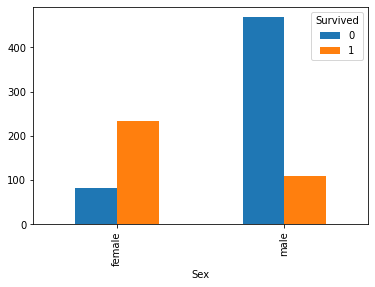

In [18]:
grouped_sex = train.groupby(['Survived','Sex']).count()['PassengerId']
print(grouped_sex)
(grouped_sex.unstack(level=0).plot.bar())
plt.show()

###  Pclass  ###
Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: PassengerId, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


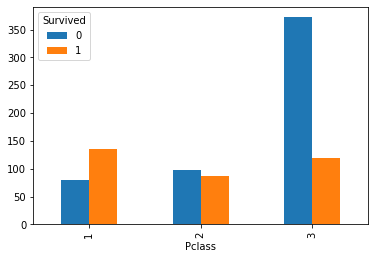

###  Sex  ###
Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


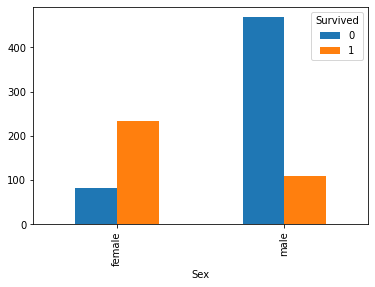

###  SibSp  ###
Survived  SibSp
0         0        398
          1         97
          2         15
          3         12
          4         15
          5          5
          8          7
1         0        210
          1        112
          2         13
          3          4
          4          3
Name: PassengerId, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


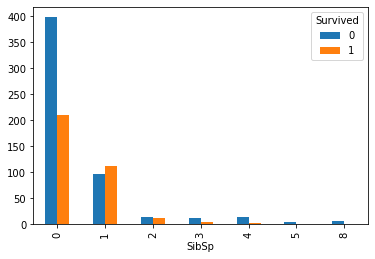

###  Parch  ###
Survived  Parch
0         0        445
          1         53
          2         40
          3          2
          4          4
          5          4
          6          1
1         0        233
          1         65
          2         40
          3          3
          5          1
Name: PassengerId, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


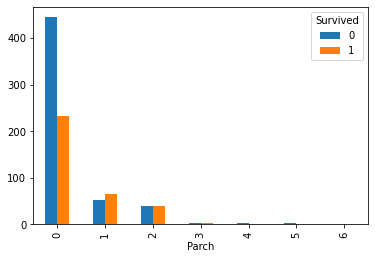

###  Embarked  ###
Survived  Embarked
0         C            75
          Q            47
          S           427
1         C            93
          Q            30
          S           217
Name: PassengerId, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


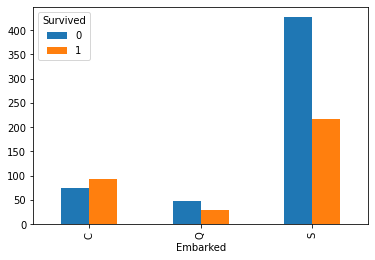

In [19]:
def target_eda(colname):
  grouped_data = train.groupby(['Survived', colname]).count()['PassengerId']
  print(grouped_data)
  print(grouped_data.unstack(level=0).plot.bar())
  plt.show()

columnas =['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for col in columnas:
  print('### ', col, ' ###')
  target_eda(col)

AxesSubplot(0.125,0.125;0.775x0.755)


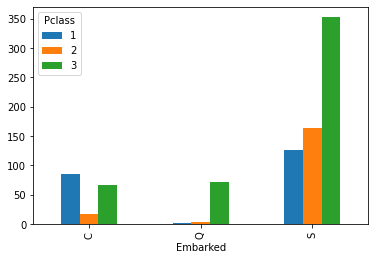

In [20]:
# embarked vs pclass
print(train.groupby(['Pclass', 'Embarked'])
        .count()['PassengerId']
        .unstack(level=0)
        .plot.bar())

### 3.Procesamiento de datos

Empezamos seleccionando las variables que queremos trabajar que serían: 
* Survived
* Sex
* Age
* Pclass

In [21]:
train[['Survived', 'Sex', 'Age', 'Pclass']].head(3)

,Survived,Sex,Age,Pclass
0,0,male,22.0,3
1,1,female,38.0,1
2,1,female,26.0,3


Estudiamos los datos nulos

In [22]:
train[['Survived', 'Sex', 'Age', 'Pclass']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


-----------------------
Tenemos que mejorar

*    Datos faltantes en Age `train['Age'].isna()`
*    La variable Sex aparece como object y queremos int o float para algoritmos
-----------------------

In [25]:
# mirar como se distribuyen los nulos en edad
(train[train['Age'].isna()]
      .groupby(['Sex', 'Pclass'])
      .count()['PassengerId']
      .unstack(level=0))

Sex,female,male
Pclass,,
1,9,21
2,2,9
3,42,94


In [26]:
(train[train['Age'].isna()]
      .groupby(['SibSp', 'Parch'])
      .count()['PassengerId']
      .unstack(level=0))

SibSp,0,1,2,3,8
Parch,,,,,
0,133.0,21.0,3.0,NaN,NaN
1,1.0,3.0,NaN,4.0,NaN
2,3.0,2.0,NaN,NaN,7.0


In [27]:
train[train['Age'].isna()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


De arriba se puede concluir que era gente que viajaba mayormente sola y la mayoría eran de 3era clase.

Esto nos da la idea de que se puede crear una variable que indique si la personal tenía pareja o parientes o no.

La crearemos más adelante


In [29]:
# calcular mediana de Age para imputar
train['Age'].median()

28.0

In [30]:
# imputar valor para rellenar nulos
train['Age'] = train['Age'].fillna(28.0)
train[['Survived', 'Sex', 'Age', 'Pclass']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


Ya no tenemos nulos. Falta resolver lo de pasar Sex a int

In [31]:
# map para label encoding
train['Sex'] = train['Sex'].map({'female': 1, 'male': 0}).astype(int)

Ahora tenemos la tabla preprocesada lista

In [32]:
train[['Survived', 'Sex', 'Age', 'Pclass']].head(3)

,Survived,Sex,Age,Pclass
0,0,0,22.0,3
1,1,1,38.0,1
2,1,1,26.0,3


### 3.1 Crear nuevas variables

In [33]:
# crear nueva variable tipo flag "solo"
train['FlagSolo'] = np.where(
    (train['SibSp'] == 0) & (train['Parch'] == 0), 1, 0)

Survived  FlagSolo
0         0           175
          1           374
1         0           179
          1           163
Name: PassengerId, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


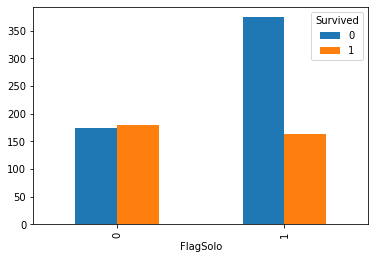

In [34]:
target_eda('FlagSolo')

In [35]:
train[['Survived', 'Sex', 'Age', 'Pclass', 'FlagSolo']].head(3)

,Survived,Sex,Age,Pclass,FlagSolo
0,0,0,22.0,3,0
1,1,1,38.0,1,0
2,1,1,26.0,3,1


Estos ya serían los datos con los que vamos a hacer modelos

In [38]:
# variable dependiente
Y_train = train['Survived']

# preprocesamiento de variables independientes
features = ['Sex', 'Age', 'Pclass', 'FlagSolo']
X_train = train[features]

print(Y_train.shape, X_train.shape)

(891,) (891, 4)


### 4. Modelos

Sin entrar en mucho detalle. Vamos a escoger dos modelos de prueba.
* regresión logistica
* arboles de decisión

In [39]:
# entrenando modelo regresión logistica
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()

In [40]:
# entrenando modelo arboles de decisión
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier()

### 5. Evaluación

Aquí vamos a hacer una matriz de confusión y evaluar que tan bueno es cada modelo

In [41]:
from sklearn.metrics import plot_confusion_matrix

def conf_mat_acc(modelo):
  disp = plot_confusion_matrix(modelo, X_train, Y_train,
                        cmap=plt.cm.Blues, values_format="d")
  true_pred = disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]
  total_data = np.sum(disp.confusion_matrix)
  accuracy = true_pred/total_data
  print('accuracy: ', np.round(accuracy, 2))
  plt.show()

accuracy:  0.79


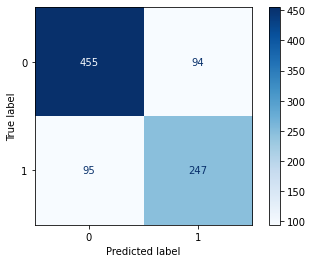

In [42]:
conf_mat_acc(logreg)

accuracy:  0.89


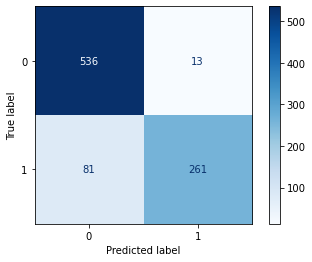

In [43]:
conf_mat_acc(decision_tree)

### 5.1 Evaluación sobre el test set

Antes hicimos la matriz de confusión sobre el train set. Esto no es del todo correcto porque estamos utilizando como validación los datos que usamos de entrenamiento. Por lo tanto, la estimación del error sería sesgada y tendría poca capacidad de generalización a casos que no haya "visto" el modelo.

Por eso necesitamos utilizar el test set. Sin embargo, Kaggle no nos regresa el valor real del test set, para verificarlo tenemos que enviar nuestros resultados y mirar el score que pone kaggle esto lo veremos más adelante

In [44]:
# ahora hay que preparar el test set para evaluación
print(test.head(3))
test.info()

   PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2          894       2         Myles, Mr. Thomas Francis    male  62.0      0   

   Parch  Ticket    Fare Cabin Embarked  
0      0  330911  7.8292   NaN        Q  
1      0  363272  7.0000   NaN        S  
2      0  240276  9.6875   NaN        Q  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 no

In [45]:
# preprocesando test set

# hacer map a Sex
test['Sex'] = test['Sex'].map({'female': 1, 'male': 0}).astype(int)

# rellenar Age
test['Age'] = test['Age'].fillna(28.0)

# Crear FlagSolo
test['FlagSolo'] = np.where(
    (test['SibSp'] == 0) & (test['Parch'] == 0), 1, 0)

In [46]:
print(test[features].head(3))
test.info()

   Sex   Age  Pclass  FlagSolo
0    0  34.5       3         1
1    1  47.0       3         0
2    0  62.0       2         1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int32  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  FlagSolo     418 non-null    int32  
dtypes: float64(2), int32(2), int64(4), object(4)
memory usage: 36.0+ KB


In [47]:
# crear test set 
X_test = test[features]

print(X_test.shape)

(418, 4)


In [48]:
# prediccion de Survived en test set
Y_pred_log = logreg.predict(X_test)
Y_pred_tree = decision_tree.predict(X_test)
print(Y_pred_log[0:10])

[0 0 0 0 1 0 1 0 1 0]


Nota: Estas predicciones deberían ser ahora comparadas con el valor real para obtener una mejor estimación del error de predicción sobre el test set y poder escoger un modelo.

Sin embargo, como es una competicion de Kaggle este valor solo lo conoce la plataforma.

Vamos a exportar estos CSV y luego subirlos para ver cual tiene mejor rendimiento.


### 6. Predicción

In [ ]:
# prediciendo sobre el test set
print(Y_pred_log[0:20])
print(Y_pred_tree[0:20])

In [50]:
# para descargar en ordenador
def download_output(y_pred, name):
  output = pd.DataFrame({'PassengerId': test.PassengerId, 
                         'Survived': y_pred})
  output.to_csv(name, index=False)

In [52]:
download_output(Y_pred_log, 'rafa_pred_log.csv')
download_output(Y_pred_tree, 'rafa_pred_tree.csv')

Luego de hacer el envio a kaggle:

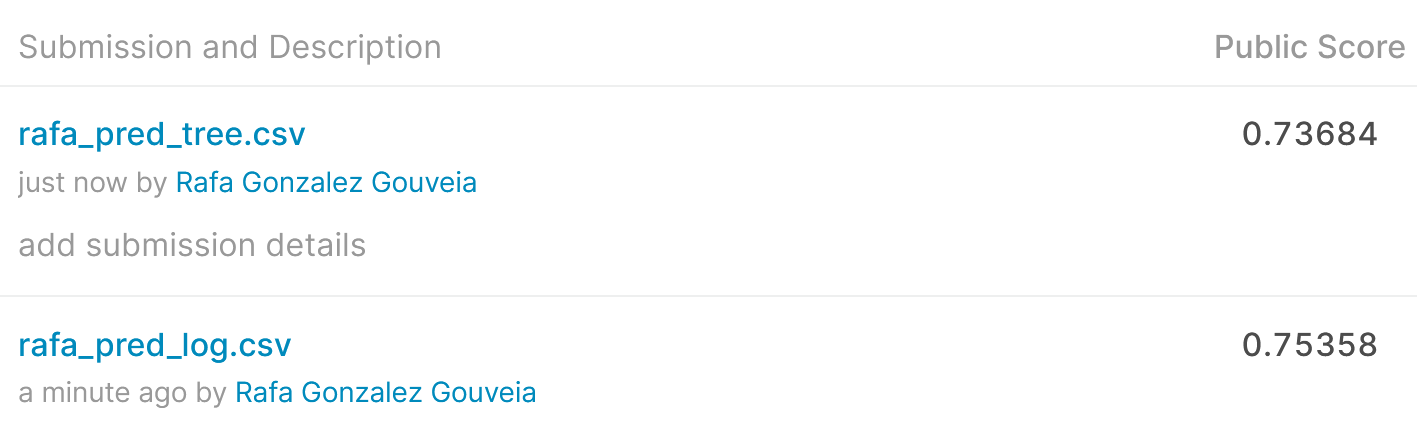

Con lo que muestra que en el test_set hay un mejor valor para accuracy que con train set.

Por esta razón, nos quedaríamos con el modelo de regresión logística. Porque generaliza mejor las predicciones para datos con los que no se ha entrenado el modelo.


# Conclusion

* importante del análisis exploratorio 
* creación de variables
* probar varios modelos
* calculo del error con el test_set
* vimos (casi) todo el proceso de ciencia de datos en un ejemplo

## próximos pasos

Ahora, lo que vendría sería desplegar este modelo a producción, hacer predicciones según lo necesite el usuario, hacer seguimiento y realizar el mantenimiento del despliegue.

Similar a como se describe superficialmente aquí https://cloud.google.com/ai-platform/docs/ml-solutions-overview

Sin embargo, estás etapas corresponden abarcan pasos relacionados a la ingeniería de software o devops que no serán cubiertos en este notebook.
